In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [128]:
df = pd.read_csv('/content/Coca-Cola_stock_history.csv')

In [129]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1962-01-02,0.050016,0.051378,0.050016,0.050016,806400,0.0,0
1,1962-01-03,0.049273,0.049273,0.048159,0.048902,1574400,0.0,0
2,1962-01-04,0.049026,0.049645,0.049026,0.049273,844800,0.0,0
3,1962-01-05,0.049273,0.049892,0.048035,0.048159,1420800,0.0,0
4,1962-01-08,0.047787,0.047787,0.046735,0.047664,2035200,0.0,0


In [130]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits'],
      dtype='object')

In [131]:
df.index

RangeIndex(start=0, stop=15311, step=1)

In [132]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
15306,2022-10-20 00:00:00-04:00,55.770000,55.919998,54.959999,55.080002,16905100,0.0,0
15307,2022-10-21 00:00:00-04:00,55.000000,56.110001,54.990002,55.959999,15028000,0.0,0
15308,2022-10-24 00:00:00-04:00,56.639999,57.730000,56.570000,57.570000,17416700,0.0,0
15309,2022-10-25 00:00:00-04:00,59.040001,59.110001,57.750000,58.950001,28829900,0.0,0
15310,2022-10-26 00:00:00-04:00,59.009998,59.779999,58.860001,59.389999,15831400,0.0,0


In [133]:
df.shape

(15311, 8)

In [134]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'KO'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

data.reset_index(inplace=True)

print(data.info())
print(data.head())


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2264 non-null   datetime64[ns]
 1   (Close, KO)   2264 non-null   float64       
 2   (High, KO)    2264 non-null   float64       
 3   (Low, KO)     2264 non-null   float64       
 4   (Open, KO)    2264 non-null   float64       
 5   (Volume, KO)  2264 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.3 KB
None
Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.662117  30.851301  30.414724  30.749431   9921100
1      2015-01-05  30.662117  31.266047  30.618461  31.062310  26292600
2      2015-01-06  30.894945  31.244205  30.734870  30.858564  16897500
3      2015-01-07  31.280609  31.367923  30.982283  31.142

**Data Cleaning**

In [135]:
# handling missing values
import yfinance as yf
import pandas as pd

ticker = 'KO'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
data.reset_index(inplace=True)

print(data.isnull().sum())

data.fillna(method='ffill', inplace=True)
data.fillna(0, inplace=True)
print(data.isnull().sum())

[*********************100%***********************]  1 of 1 completed

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64
Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64



<ipython-input-135-ba64cebdfdcd>:11: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



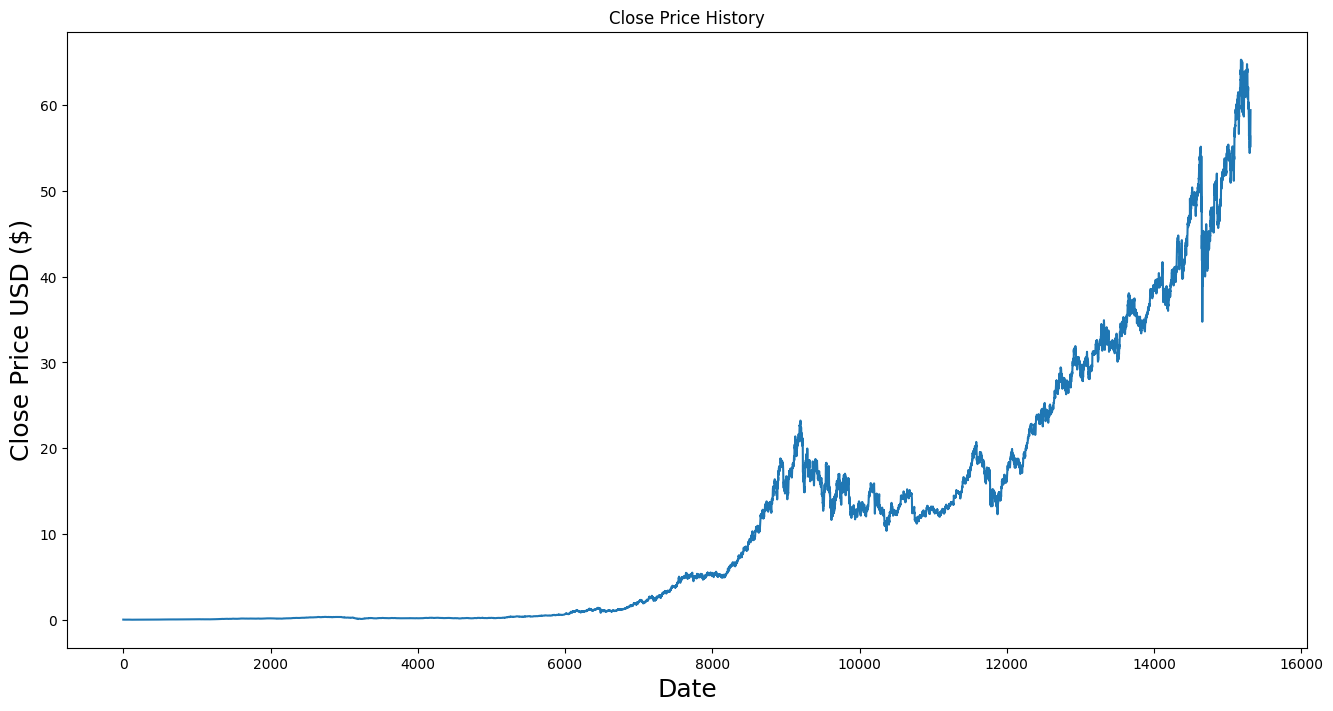

In [153]:
# Visualizing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()


**Exploratory Data Analysis (EDA)**

[*********************100%***********************]  1 of 1 completed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2264 non-null   datetime64[ns]
 1   (Close, KO)   2264 non-null   float64       
 2   (High, KO)    2264 non-null   float64       
 3   (Low, KO)     2264 non-null   float64       
 4   (Open, KO)    2264 non-null   float64       
 5   (Volume, KO)  2264 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 106.3 KB
None
Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.662117  30.851301  30.414724  30.749431   9921100
1      2015-01-05  30.662117  31.266047  30.618461  31.062310  26292600
2      2015-01-06  30.894945  31.244205  30.734870  30.858564  16897500
3      2015-01-07  31.280609  31.367923  30.982283  31.142

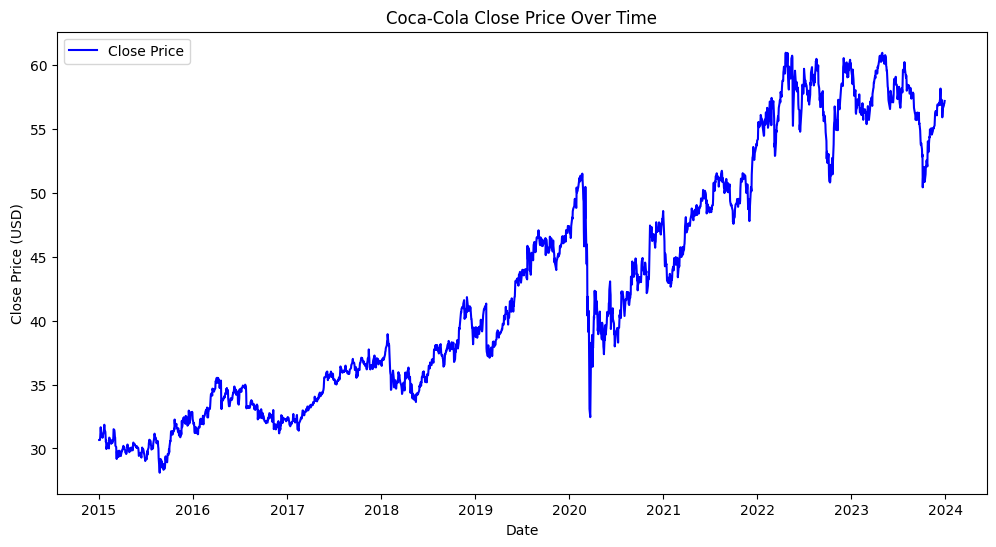

Summary Statistics:
Price                            Date        Close         High          Low  \
Ticker                                          KO           KO           KO   
count                            2264  2264.000000  2264.000000  2264.000000   
mean    2019-07-01 19:15:03.180211712    42.720887    43.014725    42.422468   
min               2015-01-02 00:00:00    28.101782    28.494471    27.043991   
25%               2017-04-02 06:00:00    34.365046    34.593893    34.193313   
50%               2019-07-02 12:00:00    40.566246    40.999900    40.229115   
75%               2021-09-29 06:00:00    50.755078    51.004781    50.369882   
max               2023-12-29 00:00:00    60.956142    61.867581    60.722549   
std                               NaN     9.613574     9.690611     9.529914   

Price          Open        Volume  
Ticker           KO            KO  
count   2264.000000  2.264000e+03  
mean      42.725973  1.412608e+07  
min       28.101784  2.996300e+06  

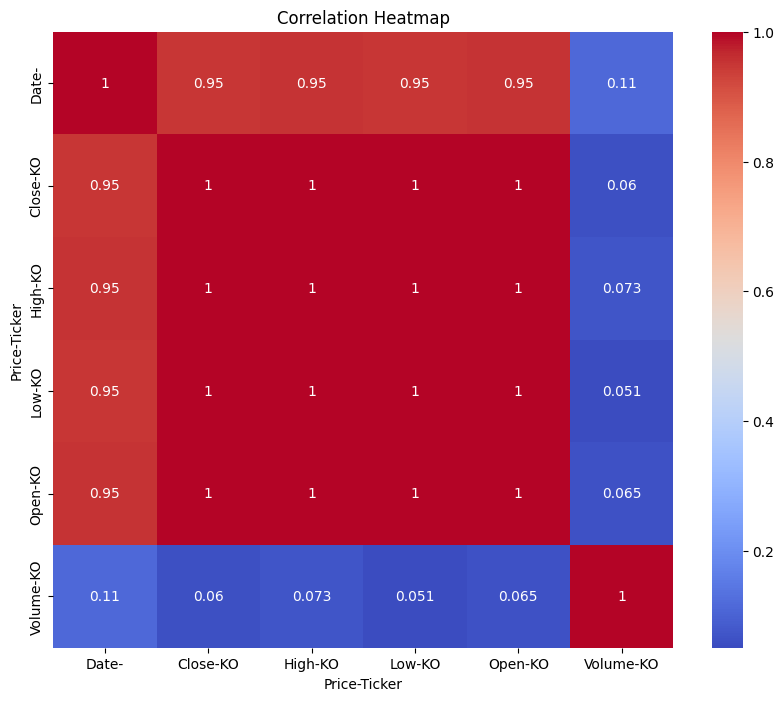

In [154]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ticker = 'KO'
data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

data.reset_index(inplace=True)

print(data.info())
print(data.head())

#Plotting the Close Price Over Time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.title('Coca-Cola Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

# Summary Statistics
print("Summary Statistics:")
print(data.describe())

#Correlation Heatmap of Numeric Features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Feature Engineering**: Adding moving averages, daily returns, and volatility

In [155]:
#Calculate 20-day and 50-day moving averages for the 'Close' price
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

#Calculate daily returns as the percentage change in the 'Close' price
data['Daily_Return'] = data['Close'].pct_change()

#Calculate volatility as the rolling standard deviation of the daily returns (20-day window)
data['Volatility'] = data['Daily_Return'].rolling(window=20).std()

data.dropna(inplace=True)

In [156]:
print(data.head())

Price        Date      Close       High        Low       Open    Volume  \
Ticker                    KO         KO         KO         KO        KO   
49     2015-03-16  29.559267  29.603285  29.339169  29.346504  15238800   
50     2015-03-17  29.720671  29.882077  29.581276  29.838057  21661800   
51     2015-03-18  29.786701  29.926099  29.199772  29.698662  26247500   
52     2015-03-19  29.361179  29.728011  29.317159  29.698663  16057600   
53     2015-03-20  29.823378  29.830713  29.353831  29.397852  31608500   

Price       MA_20      MA_50 Daily_Return Volatility  
Ticker                                                
49      30.412253  30.668404     0.009522   0.011377  
50      30.377186  30.649575     0.005460   0.011464  
51      30.348332  30.632067     0.002222   0.011486  
52      30.284377  30.601391    -0.014286   0.011604  
53      30.248625  30.572247     0.015742   0.012260  


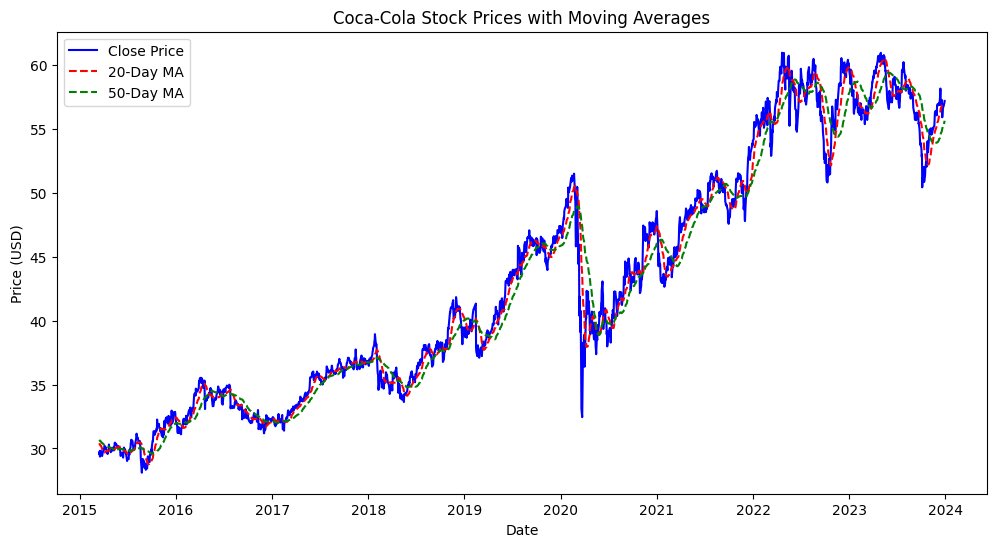

Summary Statistics:
Price                            Date        Close         High          Low  \
Ticker                                          KO           KO           KO   
count                            2215  2215.000000  2215.000000  2215.000000   
mean    2019-08-06 07:49:22.889390592    42.987010    43.282485    42.686535   
min               2015-03-16 00:00:00    28.101782    28.494471    27.043991   
25%               2017-05-24 12:00:00    34.694349    34.913765    34.470560   
50%               2019-08-07 00:00:00    40.891720    41.240370    40.536944   
75%               2021-10-16 12:00:00    50.886599    51.205594    50.619404   
max               2023-12-29 00:00:00    60.956142    61.867581    60.722549   
std                               NaN     9.549088     9.626279     9.465687   

Price          Open        Volume        MA_20        MA_50 Daily_Return  \
Ticker           KO            KO                                          
count   2215.000000  2.2150

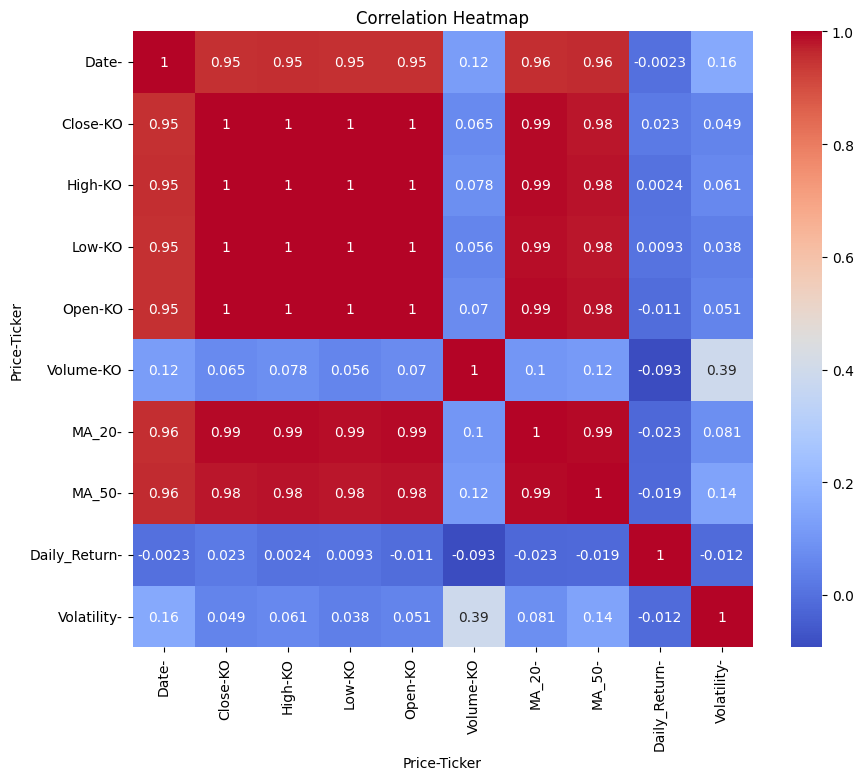

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the stock's Close price and the moving averages over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA', linestyle='--', color='red')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA', linestyle='--', color='green')
plt.title('Coca-Cola Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

# summary statistics for the dataset
print("Summary Statistics:")
print(data.describe())

# Create a correlation heatmap to examine relationships among the features
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Preprocessing Data**

In [159]:
# Using the 'Close' column for prediction
data = df.filter(['Close'])
dataset = data.values

**LSTM Model**

In [161]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

**Data Splitting and Model training:**

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_size = int(len(dataset) * 0.8)
train_data = scaled_data[0:train_size, :]
test_data = scaled_data[train_size - 60:, :]

# Preparing the data for LSTM model
def create_dataset(data, look_back=60):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back), 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 60
X_train, y_train = create_dataset(train_data, look_back)
X_test, y_test = create_dataset(test_data, look_back)


In [164]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [148]:
print(processed_data.shape)

(1277, 6)


In [149]:
print(processed_data.head())


    stock_price  days_since_start  previous_price  moving_average_7  \
29    98.093882                41      100.679094         98.201168   
30    86.497245                42       98.093882         96.550042   
31    97.084561                43       86.497245         95.928528   
32   101.493938                44       97.084561         97.686837   
33   102.943029                47      101.493938         96.967777   

    moving_average_30  volatility  
29          96.427441    6.220056  
30          96.145668    7.637752  
31          96.762764    7.345394  
32          97.298515    6.923347  
33          97.185320    5.855603  


**Training and Building the LSTM Model**

In [166]:

lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
lstm_model.add(LSTM(50, return_sequences=False))
lstm_model.add(Dense(25))
lstm_model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [167]:

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, batch_size=1, epochs=1)

12188/12188 ━━━━━━━━━━━━━━━━━━━━ 229s 19ms/step - loss: 1.9427e-04


**Evaluating the Model**

In [168]:

lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

rmse = np.sqrt(np.mean(((lstm_predictions - y_test) ** 2)))
print('LSTM Model RMSE:', rmse)


96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
LSTM Model RMSE: 40.24634859246257


**Visualizing the Results**

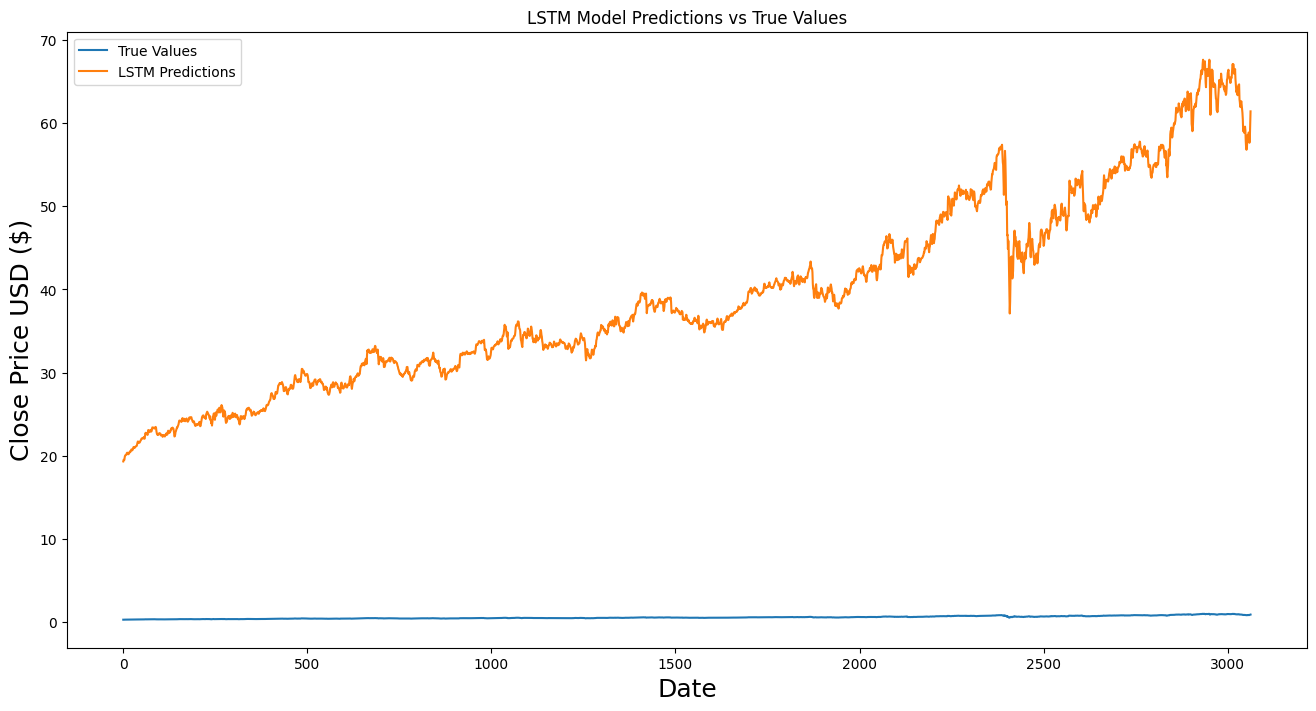

In [169]:

# Visualizing the Results for LSTM
plt.figure(figsize=(16,8))
plt.title('LSTM Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(lstm_predictions, label='LSTM Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


**SVR Model**

In [170]:
# Preparing the data for SVR model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [171]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [172]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [173]:
# Training the SVR Model
svr_model = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)


SVR(C=1000.0, gamma=0.1)

In [174]:
# Predicting and evaluating the SVR model
svr_predictions = svr_model.predict(X_test_scaled)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_predictions))
print('SVR Model RMSE:', svr_rmse)


SVR Model RMSE: 31.388272265004193


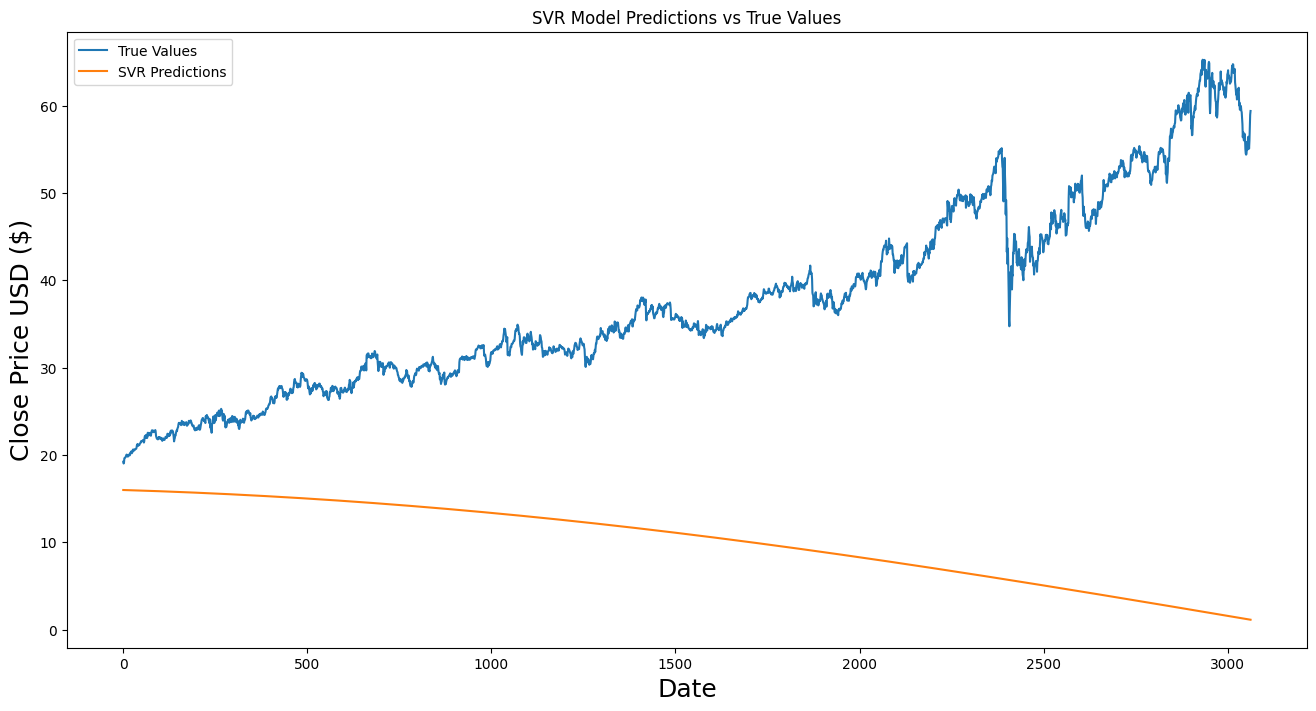

In [175]:
# Visualizing the Results for SVR
plt.figure(figsize=(16,8))
plt.title('SVR Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(svr_predictions, label='SVR Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()


**SGD Regressor Model**

In [176]:
# Preparing the data for SGD Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values


In [177]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [178]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [179]:
# Training the SGD Regressor Model
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3)
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor()

In [180]:
# Predicting and evaluating the SGD model
sgd_predictions = sgd_model.predict(X_test_scaled)
sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_predictions))
print('SGD Model RMSE:', sgd_rmse)

SGD Model RMSE: 21.811739539361373


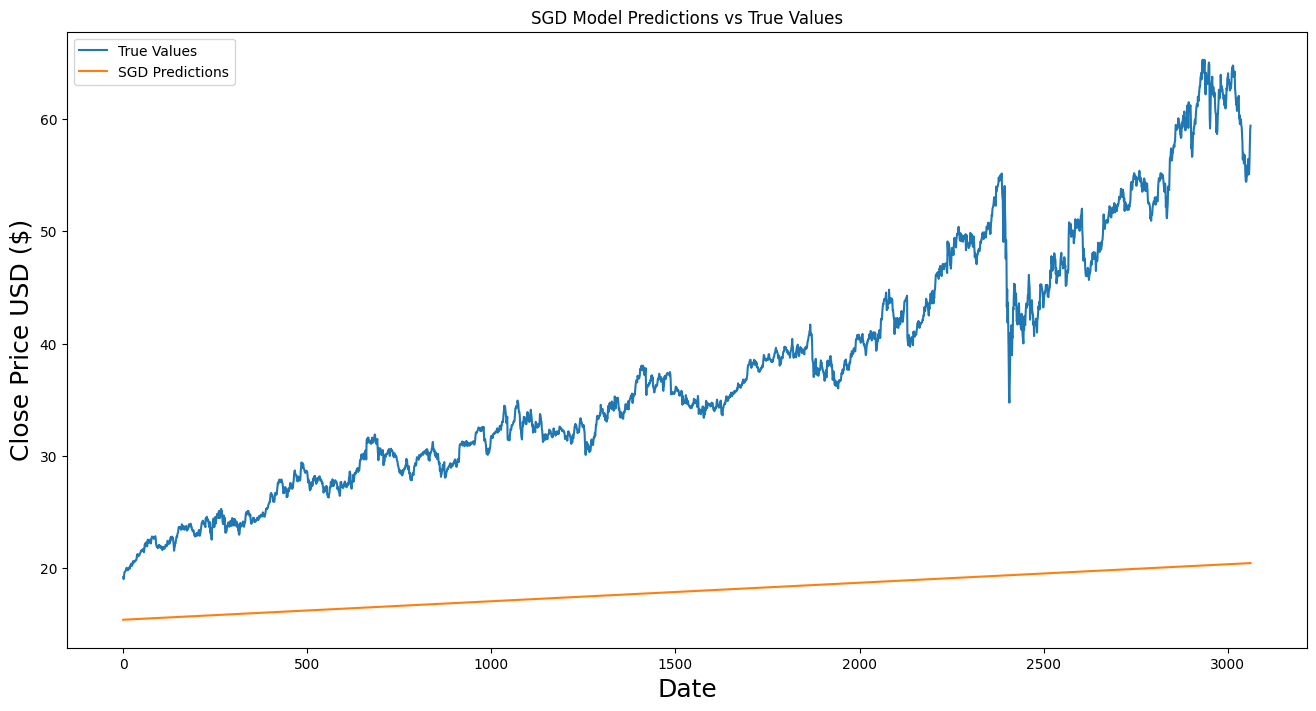

In [181]:

# Visualizing the Results for SGD
plt.figure(figsize=(16,8))
plt.title('SGD Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(sgd_predictions, label='SGD Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

**Decision Tree Regressor Model**

In [182]:
# Preparing the data for Decision Tree Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [183]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Decision Tree Regressor Model
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [184]:
# Predicting and evaluating the Decision Tree model
dtr_predictions = dtr_model.predict(X_test)
dtr_rmse = np.sqrt(mean_squared_error(y_test, dtr_predictions))
print('Decision Tree Model RMSE:', dtr_rmse)

Decision Tree Model RMSE: 21.608274306195128


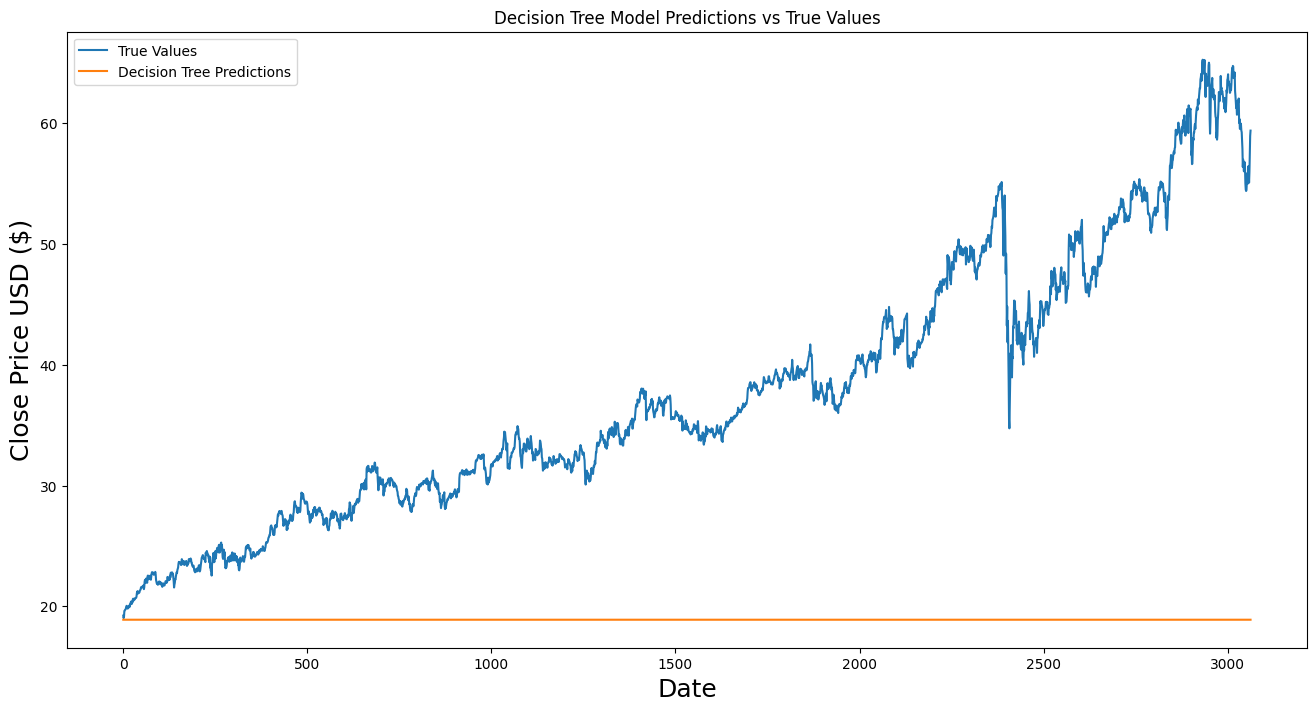

In [185]:
# Visualizing the Results for Decision Tree
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(dtr_predictions, label='Decision Tree Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

**Random Forest Regressor Model**

In [186]:
# Preparing the data for Random Forest Regressor model
X = data.index.values.reshape(-1, 1)
y = data['Close'].values

In [187]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Training the Random Forest Regressor Model
rfr_model = RandomForestRegressor(n_estimators=100)
rfr_model.fit(X_train, y_train)


RandomForestRegressor()

In [188]:
# Predicting and evaluating the Random Forest model
rfr_predictions = rfr_model.predict(X_test)
rfr_rmse = np.sqrt(mean_squared_error(y_test, rfr_predictions))
print('Random Forest Model RMSE:', rfr_rmse)

Random Forest Model RMSE: 21.57360362667442


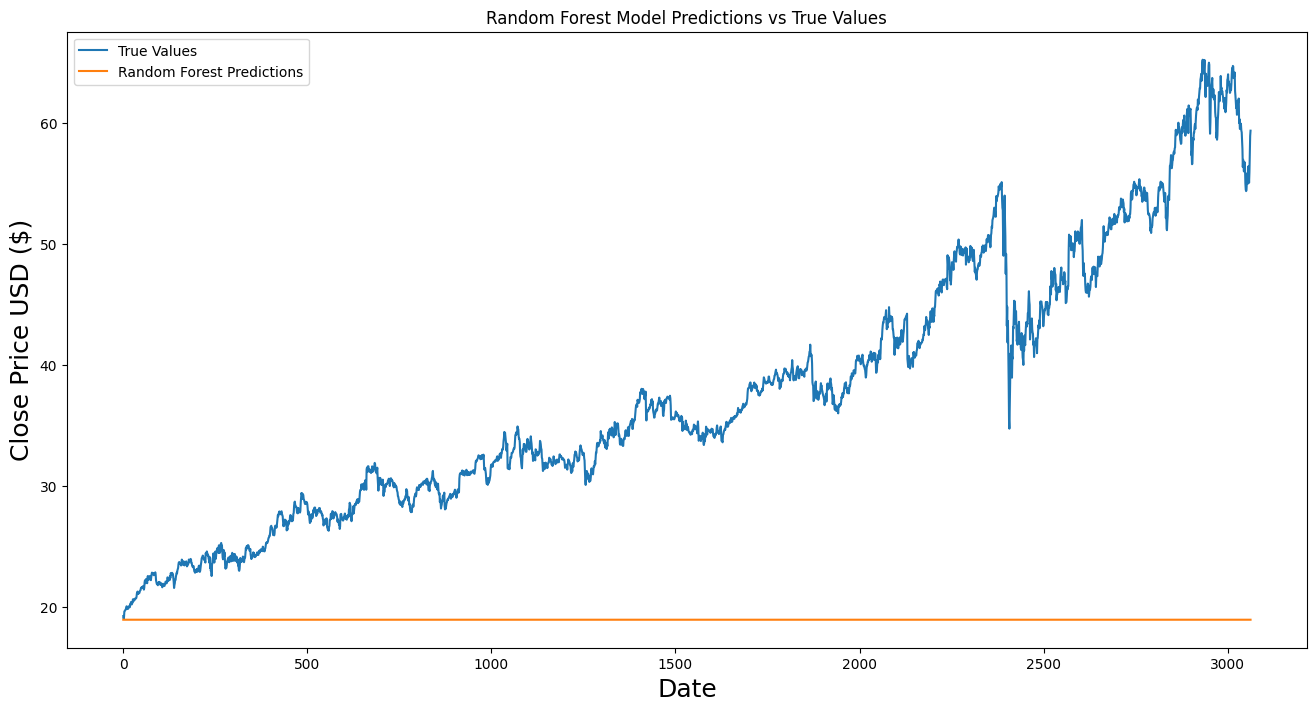

In [189]:

# Visualizing the Results for Random Forest
plt.figure(figsize=(16,8))
plt.title('Random Forest Model Predictions vs True Values')
plt.plot(y_test, label='True Values')
plt.plot(rfr_predictions, label='Random Forest Predictions')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend()
plt.show()

In [190]:
import pandas as pd

# Load stock history data
df_history = pd.read_csv("Coca-Cola_stock_history.csv")
print(df_history.head())  # Show first 5 rows
print(df_history.info())  # Check column types and missing values

# Load stock info data
df_info = pd.read_csv("Coca-Cola_stock_info.csv")
print(df_info.head())
print(df_info.info())


         Date      Open      High       Low     Close   Volume  Dividends  \
0  1962-01-02  0.050016  0.051378  0.050016  0.050016   806400        0.0   
1  1962-01-03  0.049273  0.049273  0.048159  0.048902  1574400        0.0   
2  1962-01-04  0.049026  0.049645  0.049026  0.049273   844800        0.0   
3  1962-01-05  0.049273  0.049892  0.048035  0.048159  1420800        0.0   
4  1962-01-08  0.047787  0.047787  0.046735  0.047664  2035200        0.0   

   Stock Splits  
0             0  
1             0  
2             0  
3             0  
4             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          15311 non-null  object 
 1   Open          15311 non-null  float64
 2   High          15311 non-null  float64
 3   Low           15311 non-null  float64
 4   Close         15311 non-null  float64
 5   Volume        1

In [192]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Coca-Cola_stock_history.csv")  # Make sure this file exists

# Feature Engineering
df["MA_20"] = df["Close"].rolling(window=20).mean()
df["MA_50"] = df["Close"].rolling(window=50).mean()
df["Daily_Return"] = df["Close"].pct_change()
df["Volatility"] = df["Daily_Return"].rolling(window=20).std()

df.dropna(inplace=True)

# Define features and target
features = ["Open", "High", "Low", "Volume", "MA_20", "MA_50", "Daily_Return", "Volatility"]
target = "Close"

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("✅ coca_cola_model.pkl")


✅ coca_cola_model.pkl
